In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plotRegistrationErrors(mean_errors, min_errors, max_errors):
    # Plot the TRE mean value and the [min-max] range.
    figTre, axTre = plt.subplots(1, 1)
    axTre.plot(mean_errors, color="black", label="Průměrná vzdálenost")
    axTre.fill_between(range(len(mean_errors)), min_errors, max_errors,
                     facecolor="red", alpha=0.5, label="Rozsah vzdáleností")
    axTre.xlabel("Počet iterací", fontsize=14)
    axTre.ylabel("Rozdíl vzdáleností (TRE) [mm]", fontsize=14)
    axTre.set_title("Míra nepřesnosti registrace", fontsize=16)
    axTre.legend()

    plt.show()
    
def plotMetricValues(metric_values, multires_iters):
    figMetric, axMetric = plt.subplots()
    axMetric.plot(range(0, len(metric_values)), metric_values, label="Vzájemná informace")
    axMetric.plot(multires_iters, metric_values[multires_iters], marker="o", label="Úroveň registrace", linestyle="none",
                  markeredgecolor="none", markersize=6.)
    axMetric.set_xlabel("Iterace [-]", fontsize=14)
    axMetric.set_ylabel("Vzájemná informace [-]", fontsize=14)
    axMetric.set_title("Minimalizace podobnostní metriky", fontsize=16)
    axMetric.grid(alpha=0.5)
    axMetric.legend()
    plt.show()

In [2]:
regInfo = np.load("input_files\\pacient_09\\registration\\gradient\\pacient09registrationInfo.npz")
print(regInfo.files)

metricValues = regInfo["metricValues"]
finalIter = regInfo["finaliter"]
multiresIters = regInfo["multiresIters"]
shrinkFactors = regInfo["shrink_factors"]
smoothingSigmas = regInfo["smoothing_sigmas"]

['metricValues', 'finaliter', 'multiresIters', 'shrink_factors', 'smoothing_sigmas']


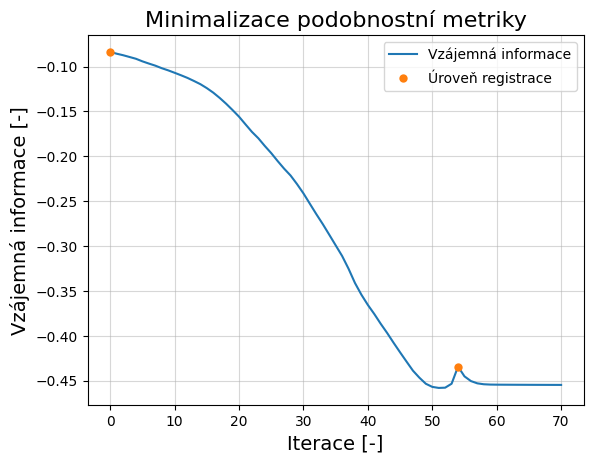

In [20]:
plotMetricValues(metricValues, multiresIters)